## Behavioural Finance ##

Assume Barberis, Huang, and Santos economy where investor receives utility from consumption as well as recent financial gain or loss. Use these parameters:

$$
\delta = 0.99 , \gamma  = 1 , \lambda =2
$$
Consumption growth has lognormal distribution:
$$
ln\tilde{g} = 0.02 + 0.02 \tilde{\epsilon}
$$

where $\epsilon$ is standard normal random variable. Simulate probability distribution for consumption growth with (at least) 104 random draws from standard normal distribution.

Recall consumption growth with disaster has the following distribution:
$$
ln\left(\frac{\tilde{C_1 ^*}}{C_0 ^*}\right) = \mu _c + \sigma _c \tilde{z} + \tilde{\nu}
$$
Where

* $\mu _c$  : mean of consumption growth
* $\sigma _c$   : std dev of consumption growth
* $\tilde{z}$   : normally distributed
* $\tilde{\nu}$ : represents rare disaster

With these parameters, risk-free rate is around 3% per year:

$$
    R_f = \frac{e^{0.0198}}{0.99} = 1.0303
$$
Risk free rate return is derived from the **first-order condition for optimal individual consumption** which yields:
$$
\delta = e^{-\rho} \\
R_f = e^{\rho + \gamma \mu _c - \frac{1}{2} \gamma ^2 \sigma _c^2}
$$
Where

* $\delta$  : subjective discount factor 

Define x as one plus dividend yield for market portfolio:

$$
    x = 1 + \frac{D}{P}
$$ 

Ideally, we follow lecture note,

$$
\frac{P_t}{D_t} = k \\
\kappa = \frac{1+k}{k}
$$
Where

* $\frac{P_t}{D_t}$  : price-dividend ratio

and define error term:
$$
e(x) = 0.99 b_0 E[v(x\tilde{g})] + 0.99x - 1
$$

or if we follow lecture note, , **the equilibrium condition for price-dividend ratio of market portfolio (rearrange to get error like above):**
$$
\delta b_0 E_t[v(\kappa e^{\mu _c + \sigma _c \epsilon _{t+1}})] + 
\delta \kappa e^{(1-\gamma)\mu + \frac{1}{2}(1-\gamma) ^2 \sigma ^2} = 1
$$

where utility from recent financial gain or loss is given by:
$$
v(R) = R - R_f, R \geq R_f\\
v(R) = \lambda (R- R_f), R < R_f

$$
Solve for e(x) = 0 to find equilibrium value of x

* Calculate price-dividend ratio for market portfolio. Plot price-dividend ratio (on vertical axis) vs b0:
$$
\frac{P}{D} = \frac{1}{x-1}
$$ 
 


* Calculate expected market return. Plot equity premium (on vertical axis) vs b0:
$$
E[\tilde{R_m}] = E(x\tilde{g}) = xe^{0.0202} \\
E_t[R_{t+1}] = \kappa E_t(e^{\mu + \sigma \epsilon _{t+1}}) = \kappa e ^{\mu + \frac{1}{2}\sigma^2}
$$

* Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from typing import Callable

In [2]:
# setup params : thank you eko
no_of_draws = 100000
my_delta = 0.99
my_gamma = 1
my_lambda = 2.0
my_rho = -np.log(my_delta)
my_consumption_mu = 0.02
my_consumption_sigma = 0.02

R_f = np.exp(
    my_rho
    + my_gamma * my_consumption_mu
    - 0.5 * (my_gamma**2) * (my_consumption_sigma**2)
)
R_f

1.0303003233953707

In [3]:
# random point generation
epsilon = np.random.standard_normal(no_of_draws)
g = np.exp(my_consumption_mu + my_consumption_sigma * epsilon)

In [4]:
# generate b_0
b_0 = np.arange(0, 10.1, 0.1)
b_0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Define error term
$$e(x) = 0.99b_0E[v(x\tilde{g})]+0.99x -1$$

where 
$$v(R) = r - 1.0303 ; R\geq 1.0303$$
$$v(R) = 2(r - 1.0303) ; R < 1.0303$$
$$ R_f \approx 1.0303$$
solve to minimize e(x)

In [5]:
err_tolerance = 1e-5

In [6]:
def utility(r: [float], R_f: float, my_lambda: float) -> [float]:
    """piecewise linear function of utility from recent financial gain/loss

    Args:
        r (float]): list of random returns
        R_f (float): risk free rate return
        my_lambda (float): loss aversion coefficient

    Returns:
        [float]: utility of investment return relative to R_f
    """
    return list(map(lambda x: (x - R_f) if x >= R_f else my_lambda * (x - R_f), r))

In [7]:
# wah thank you eko
def kappa_numerical_error(
    delta: float,
    b_0: float,
    consumption_growth: float,
    gamma: float,
    mu: float,
    sigma: float,
    kappa: float,
    my_lambda: float,
    util_func: Callable[[float, float, float], float],
) -> float:
    """error minimizing function for kappa iteration

    Args:
        delta (float): subjective discount factor
        b_0 (float): scaling factor for utility from recent financial gain/loss
        consumption_growth (float): random consumption growth, lognormally distributed
        gamma (float): CRRA coefficient assuming power utility function of consumption
        mu (float): consumption mean
        sigma (float): consumption sigma
        kappa (float): (1+k)/k where k is price-dividend ratio
        my_lambda (float): lambda for piecewise linear function to approximate v()
        util_func (Callable[[float, float, float], float]): function of v()

    Returns:
        float: error relative to equilibrium condition
    """
    expected_utility = np.mean(util_func(consumption_growth * kappa, R_f, my_lambda))
    first_term = delta * b_0 * expected_utility
    second_term = (
        delta * kappa * np.exp((1 - gamma) * mu + 0.5 * (1 - gamma) ** 2 * sigma**2)
    )
    third_term = -1
    return first_term + second_term + third_term

In [8]:
# should we implement our own bisection search ?
def bisect_x(x_lower: float, x_upper: float, b: float, g: [float]):
    """self implement bisection function, takes about 40s but whatever

    Args:
        x_lower (float): lower bound for x (kappa)
        x_upper (float): upper bound for x (kappa)
        b (float): scaling factor for utility from recent financial gain/loss (b_0)
        g ([float]):  random consumption growth, lognormally distributed

    Returns:
        _type_: _description_
    """
    x_0 = (x_lower + x_upper) / 2.0
    error = kappa_numerical_error(
        my_delta,
        b,
        g,
        my_gamma,
        my_consumption_mu,
        my_consumption_sigma,
        x_0,
        my_lambda,
        utility,
    )
    if np.abs(error) <= err_tolerance:
        return x_0
    else:
        if (error > 0) and (np.abs(error) > err_tolerance):
            x_0 = bisect_x(x_lower, x_0, b, g)
        elif (error < 0) and (np.abs(error) > err_tolerance):
            x_0 = bisect_x(x_0, x_upper, b, g)
    return x_0

In [9]:
possible_x = []
x_lower = 1.0
x_upper = 1.1
for b in b_0:
    my_x = bisect_x(x_lower, x_upper, b, g)
    possible_x.append(my_x)
print(possible_x)

[1.010107421875, 1.0107421874999998, 1.01124267578125, 1.0116455078125002, 1.011962890625, 1.0122314453125, 1.012457275390625, 1.012646484375, 1.0128173828125, 1.0129638671874996, 1.01309814453125, 1.0132080078125, 1.013311767578125, 1.0134033203125, 1.01348876953125, 1.0135681152343752, 1.01363525390625, 1.0136993408203125, 1.0137573242187499, 1.0138122558593752, 1.013861083984375, 1.013909912109375, 1.0139526367187501, 1.0139953613281252, 1.014031982421875, 1.014068603515625, 1.01409912109375, 1.0141326904296875, 1.0141632080078125, 1.014190673828125, 1.0142181396484378, 1.0142425537109376, 1.0142669677734377, 1.014288330078125, 1.0143096923828125, 1.0143310546875002, 1.0143493652343754, 1.0143707275390628, 1.0143859863281253, 1.0144042968750002, 1.0144210815429688, 1.0144378662109377, 1.0144531250000002, 1.0144653320312502, 1.0144805908203127, 1.0144927978515625, 1.014506530761719, 1.014520263671875, 1.0145309448242186, 1.0145416259765625, 1.0145538330078125, 1.0145645141601562, 1.0

In [10]:
# using function
possible_return = list(
    map(
        lambda x: x
        * np.exp(my_consumption_mu + (0.5 * np.power(my_consumption_sigma, 2))),
        possible_x,
    )
)
print(possible_return)

[1.0307190685685532, 1.0313667868404819, 1.0318774877856567, 1.0322885397659194, 1.0326123989018836, 1.032886433555392, 1.0331168717867512, 1.0333099416562685, 1.0334843273448646, 1.0336338007922325, 1.0337708181189869, 1.0338829232045132, 1.0339888002297322, 1.0340822211343372, 1.0341694139786355, 1.0342503787626267, 1.0343188874260039, 1.0343842820592273, 1.0344434486321437, 1.0344995011749072, 1.0345493256573628, 1.034599150139819, 1.0346427465619683, 1.0346863429841173, 1.0347237113459593, 1.0347610797078013, 1.0347922200093362, 1.0348264743410247, 1.0348576146425599, 1.0348856409139413, 1.0349136671853232, 1.034938579426551, 1.0349634916677792, 1.0349852898788534, 1.035007088089928, 1.0350288863010029, 1.035047570481924, 1.0350693686929984, 1.035084938843766, 1.0351036230246868, 1.035120750190531, 1.0351378773563753, 1.0351534475071429, 1.035165903627757, 1.0351814737785245, 1.0351939298991384, 1.0352079430348293, 1.0352219561705198, 1.0352328552760568, 1.0352437543815944, 1.03525

In [11]:
possible_return_expectation = list(
    map(
        lambda x: np.mean(x * g),
        possible_x,
    )
)
print(possible_return_expectation)

[1.0308007329790965, 1.0314485025700824, 1.0319592439783603, 1.0323703285264858, 1.0326942133219787, 1.0329682696873959, 1.0331987261764968, 1.0333918113430403, 1.0335662108483061, 1.0337156961385332, 1.0338527243212423, 1.033964838288913, 1.034070723702824, 1.0341641520092162, 1.034251351761849, 1.0343323229607224, 1.0344008370520763, 1.0344662368665511, 1.034525408127266, 1.0345814651111016, 1.0346312935411772, 1.0346811219712533, 1.0347247218475697, 1.0347683217238863, 1.0348056930464429, 1.0348430643689999, 1.034874207137797, 1.0349084641834743, 1.0349396069522716, 1.0349676354441895, 1.034995663936107, 1.0350205781511452, 1.0350454923661832, 1.035067292304341, 1.0350890922424996, 1.0351108921806575, 1.0351295778419363, 1.0351513777800943, 1.035166949164493, 1.0351856348257715, 1.0352027633486098, 1.0352198918714486, 1.0352354632558474, 1.0352479203633662, 1.0352634917477648, 1.0352759488552836, 1.0352899631012427, 1.0353039773472013, 1.0353148773162801, 1.0353257772853595, 1.03533

In [12]:
df = pd.DataFrame(
    list(zip(b_0, possible_x, possible_return, possible_return_expectation)),
    columns=("b", "x", "exp_return", "exp_return_exp"),
)
df["pd_ratio"] = 1 / (df["x"] - 1)
df

,b,x,exp_return,exp_return_exp,pd_ratio
0,0.0,1.010107,1.030719,1.030801,98.937198
1,0.1,1.010742,1.031367,1.031449,93.090909
2,0.2,1.011243,1.031877,1.031959,88.946797
3,0.3,1.011646,1.032289,1.032370,85.870021
4,0.4,1.011963,1.032612,1.032694,83.591837
...,...,...,...,...,...
96,9.6,1.014833,1.035541,1.035623,67.416932
97,9.7,1.014836,1.035544,1.035626,67.403065
98,9.8,1.014839,1.035547,1.035629,67.389203
99,9.9,1.014842,1.035550,1.035633,67.375347


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


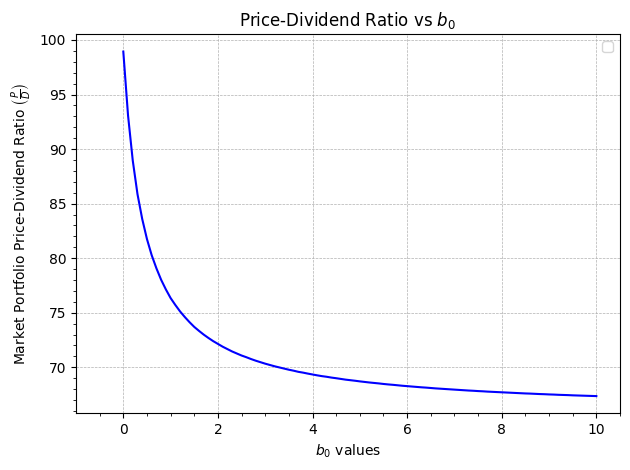

In [13]:
# plot price-dividend ratio vs b_0
f0, ax0 = plt.subplots(1)
ax0.plot(df["b"], df["pd_ratio"], color="blue")
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.yaxis.set_major_locator(ticker.AutoLocator())
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.set_xlim(-1)
ax0.set_xlabel(r"$b_0$ values")
ax0.set_ylabel(r"Market Portfolio Price-Dividend Ratio $\left(\frac{P}{D}\right)$")
ax0.grid(linestyle="--", linewidth=0.5)
ax0.legend()
ax0.set_title(r"Price-Dividend Ratio vs $b_0$")
f0.tight_layout()
plt.show(f0)
f0.savefig("f0.jpg")

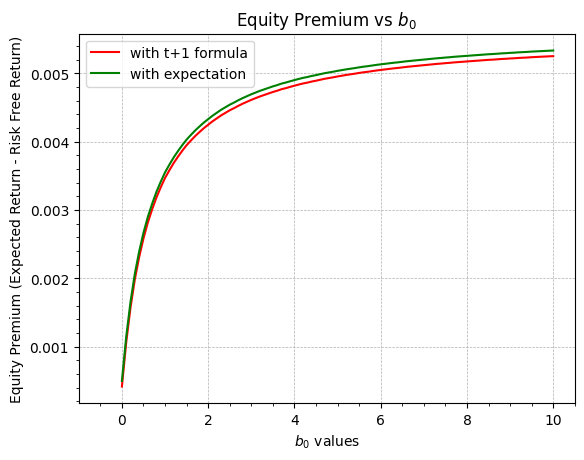

In [14]:
# plot equity premium vs b_0
f1, ax1 = plt.subplots(1)
ax1.plot(df["b"], df["exp_return"] - R_f, color="red", label="with t+1 formula")
ax1.plot(df["b"], df["exp_return_exp"] - R_f, color="green", label="with expectation")
ax1.xaxis.set_major_locator(ticker.AutoLocator())
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_major_locator(ticker.AutoLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.set_xlim(-1)
ax1.set_xlabel(r"$b_0$ values")
ax1.set_ylabel(r"Equity Premium (Expected Return - Risk Free Return)")
ax1.grid(linestyle="--", linewidth=0.5)
ax1.legend()
ax1.set_title(r"Equity Premium vs $b_0$")
f1.savefig("f1.jpg")

In [16]:
r = np.linspace(0.95, 1.15, 100)
u = utility(r, R_f, my_lambda)
f0, ax0 = plt.subplots(1)

ax0.plot(r, u, color="blue")
ax0.axvline(x=R_f, color="red", linestyle="dashed")
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.yaxis.set_major_locator(ticker.AutoLocator())
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.set_xlabel(r"Investment returns")
ax0.set_ylabel(r"Utility from recent financial gain or loss")
ax0.grid(linestyle="--", linewidth=0.5)
ax0.legend()
ax0.set_title(r"Utility vs Return")
plt.show(f0)
f0.savefig("f1.jpg")

TypeError: 'numpy.float64' object is not iterable